In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense
from keras.models import Sequential

In [3]:
img_shape = (28,28,1)
model = Sequential()
model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(12,3))
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10))

model.add(Activation('softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 12)        660       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 12)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 12)          0         
_________________________________________________________________
flatten (Flatten)            (None, 300)               0

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [6]:
from keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:

x_train.shape

(60000, 28, 28)

In [9]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
y_train.shape

(60000,)

In [12]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 35s 4ms/step - loss: 1.3406 - acc: 0.8649 - val_loss: 0.2092 - val_acc: 0.9443
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1586 - acc: 0.9565 - val_loss: 0.1355 - val_acc: 0.9620
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1028 - acc: 0.9699 - val_loss: 0.0918 - val_acc: 0.9754
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0805 - acc: 0.9751 - val_loss: 0.0844 - val_acc: 0.9753
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0678 - acc: 0.9790 - val_loss: 0.0733 - val_acc: 0.9781
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0619 - acc: 0.9805 - val_loss: 0.0699 - val_acc: 0.9792
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0545 - acc: 0.9826 - val_loss: 0.0591 - val_acc: 0.9820
Epoch 8/10
1875/1875 [==============================] - 8s 4m

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.0662686675786972 / Test accuracy: 0.9825999736785889


In [14]:
history.history

{'acc': [0.8649166822433472,
  0.9564833045005798,
  0.9698666930198669,
  0.9750666618347168,
  0.978950023651123,
  0.9805166721343994,
  0.982616662979126,
  0.9834499955177307,
  0.9852166771888733,
  0.9850999712944031],
 'loss': [1.3406327962875366,
  0.1585901528596878,
  0.1027633398771286,
  0.08050589263439178,
  0.06784972548484802,
  0.06189301609992981,
  0.05451247841119766,
  0.051642801612615585,
  0.04740207642316818,
  0.04648922383785248],
 'val_acc': [0.9442999958992004,
  0.9620000123977661,
  0.9753999710083008,
  0.9753000140190125,
  0.9781000018119812,
  0.979200005531311,
  0.9819999933242798,
  0.9799000024795532,
  0.9811000227928162,
  0.9825999736785889],
 'val_loss': [0.20924736559391022,
  0.13549695909023285,
  0.09175050258636475,
  0.08444579690694809,
  0.07334484159946442,
  0.06989344209432602,
  0.059144526720047,
  0.059122998267412186,
  0.06709012389183044,
  0.0662686675786972]}

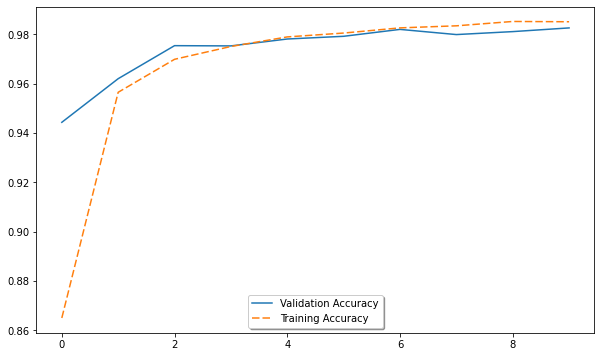

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()

In [16]:
from keras.regularizers import l2

# Set up model
model = Sequential()

# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,3,input_shape=img_shape, kernel_regularizer=l2(0.01)))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Conv2D(12,3,activity_regularizer=l2(0.01)))

model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [18]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 81.3199 - acc: 0.5967 - val_loss: 1.8894 - val_acc: 0.7077
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5655 - acc: 0.7459 - val_loss: 1.2630 - val_acc: 0.7956
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0980 - acc: 0.8149 - val_loss: 0.8988 - val_acc: 0.8559
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7943 - acc: 0.8637 - val_loss: 0.6571 - val_acc: 0.8912
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6131 - acc: 0.8910 - val_loss: 0.5255 - val_acc: 0.9085
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4936 - acc: 0.9104 - val_loss: 0.4204 - val_acc: 0.9261
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3992 - acc: 0.9268 - val_loss: 0.3430 - val_acc: 0.9382
Epoch 8/10
1875/1875 [==============================] - 8s 4m

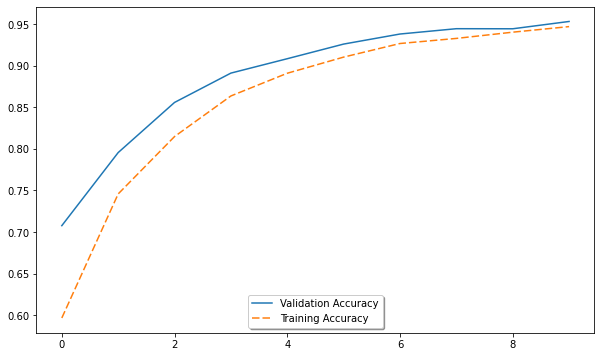

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()

In [20]:
from keras.layers import Dropout


model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [22]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 3.6136 - acc: 0.6799 - val_loss: 0.3407 - val_acc: 0.8988
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4237 - acc: 0.8690 - val_loss: 0.1946 - val_acc: 0.9414
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2719 - acc: 0.9159 - val_loss: 0.1264 - val_acc: 0.9602
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2003 - acc: 0.9379 - val_loss: 0.1160 - val_acc: 0.9632
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1695 - acc: 0.9462 - val_loss: 0.0786 - val_acc: 0.9752
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1489 - acc: 0.9539 - val_loss: 0.0758 - val_acc: 0.9755
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1394 - acc: 0.9559 - val_loss: 0.0702 - val_acc: 0.9776
Epoch 8/10
1875/1875 [==============================] - 9s 5ms

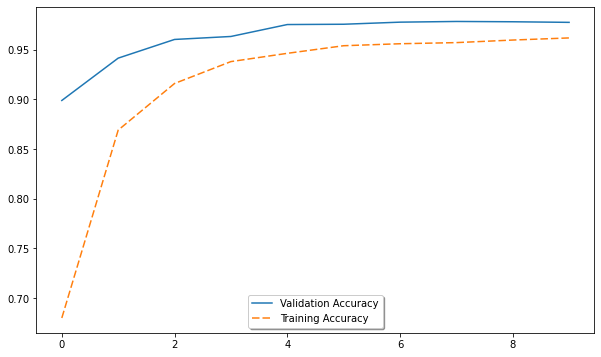

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()

In [24]:
from keras.layers import BatchNormalization
model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))


In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [26]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3053 - acc: 0.9043 - val_loss: 0.0875 - val_acc: 0.9713
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1295 - acc: 0.9592 - val_loss: 0.0682 - val_acc: 0.9780
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1102 - acc: 0.9654 - val_loss: 0.0720 - val_acc: 0.9745
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1020 - acc: 0.9679 - val_loss: 0.0683 - val_acc: 0.9768
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0947 - acc: 0.9703 - val_loss: 0.0584 - val_acc: 0.9792
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0904 - acc: 0.9714 - val_loss: 0.0514 - val_acc: 0.9820
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0882 - acc: 0.9732 - val_loss: 0.0498 - val_acc: 0.9825
Epoch 8/10
1875/1875 [==============================] - 9s 5m

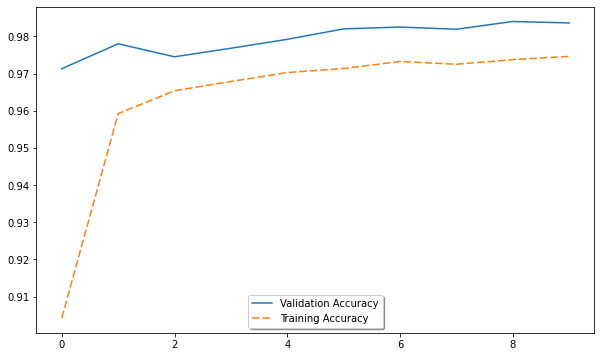

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()